In [1]:
# Imports
import tensorflow as tf
print(tf.__version__)
import h5py, os
import numpy as np
import matplotlib.pyplot as plt
fileI = "train.mat" # In some cases(eg, VSC running .ipynb file) this path may need to be defined statically.
fileVal = "valid.mat"
print("Everything is more or less working.")


2.0.0
Everything is more or less working.


In [2]:
# Loading data
# This cell uses a LOT of RAM and battery power.
# train.mat contains 3.4GB of data, but, in some cases,
# RAM usage is much higher. This could be caused by:
"""
- Other processes
- The source running the .ipynb file(eg VSC has many extra features == extra RAM usage)
- Multiple variables storing the file; shallow copying may account for this, but it still remains a problem.
"""

print(os.path.exists(fileI))
f = h5py.File(fileI, "r+")
print(f.keys())
inputs = f.get("trainxdata")[()]
print(inputs.shape)
print(inputs[0])
outputs = f.get("traindata")[()]
print("Loaded train data.")


True
<KeysViewHDF5 ['traindata', 'trainxdata']>
(1000, 4, 4400000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]]
Loaded train data.


In [3]:
# Outputs are 919 chromatin features.
# 125 DNase features, 690 TF features, and 104 histone predictions.
# Our inputs, on the other hand,
# Are of length (1000, 4)
# Deleting the initial training array(f) aids in decreasing memory usage a little.
del f
print(inputs[0])
threshold = int(len(inputs) * 3/4)
inputVal = np.transpose(inputs, (2, 0, 1))[threshold:]
outputVal = outputs[:,threshold:].T
print(inputVal.shape, outputVal.shape)
inputs = np.transpose(inputs, (2, 0, 1))[:threshold]
outputs = outputs[:,:threshold].T
print(inputs.shape, outputs.shape)



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]]
(4399250, 1000, 4) (4399250, 919)
(750, 1000, 4) (750, 919)


In [4]:
# Here is some data to show
# This is the input; we can only show a certain
# Amount of letters before it doesn't look nice anymore,
# So here is a barcode-like representation:

# plt.imshow(inputs[8][:100])
# plt.show()
# Here is the output(validation set), displayed as a bar code.
version = 1
def argmaxFunc(a):
    return np.array([np.argmax(i) for i in a])
# argmaxFunc = np.vectorize(myFunc)
def drawOutput(outputIn, outputOut, max_len=300):
    subplotO, axO = plt.subplots(max_len)
    for i in range(len(axO)):
        if i % 10 == 0:
            print((i / len(axO))*100)
            # print(outputOut[i] - outputIn[i])
        # plt.figure().set_axis_off()
        axO[i].axis("off")
        axO[i].imshow(np.absolute(outputIn[i] - outputOut[i]).reshape((1, -1)), aspect="auto", interpolation=None)
    plt.show()
        # plt.savefig(F"Imgs/inputShape{version}.png")
    # subplotO.show()
    subplotO.savefig(F"Imgs/outputShape{version}.png")
    # plt.clf()
    # return plt
def draw(inputs, outputs, max_len=200):
    subplotI, axI = plt.subplots(max_len)
    subplotO, axO = plt.subplots(max_len)
    print(subplotI, "HEY", len(axO))
    for i in range(len(axO)):
        if i % 10 == 0:
            print((i / len(axO))*100)
        # plt.figure().set_axis_off()
        axO[i].axis("off")
        axO[i].imshow(outputs[i].reshape((1, -1)), aspect="auto", cmap="binary", interpolation=None)
        # plt.figure().set_axis_off()
        axI[i].axis("off")
        axI[i].imshow(argmaxFunc(inputs[i]).reshape((1, -1)), aspect="auto", interpolation=None)
    plt.show()
        # plt.savefig(F"Imgs/inputShape{version}.png")
    # subplotO.show()
    subplotO.savefig(F"Imgs/outputShape{version}.png")
    # plt.clf()
    # subplotI.show()
    subplotI.savefig(F"Imgs/inputShape{version}.png")
    # plt.clf()
    # return plt
print(outputVal.shape, outputs.shape)
# drawOutput(outputs, outputVal, max_len=len(outputs))
# Looking at the data

(4399250, 919) (750, 919)


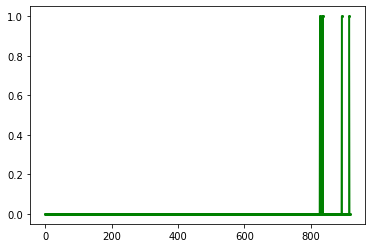

0 percent through
10 percent through
21 percent through
32 percent through
43 percent through
54 percent through
65 percent through
76 percent through
87 percent through
97 percent through


KeyboardInterrupt: 

In [5]:
infoFile = "journal.pcbi.1007616.s007.xlsx"
import xlrd
fullCellData = []
workbook = xlrd.open_workbook(infoFile)
worksheet = workbook.sheet_by_index(0)
for row in range(1, worksheet.nrows):
    fullCellData.append({
        "cell": worksheet.cell_value(row,0),
        "regulatory element": worksheet.cell_value(row,1),
        "treatment": worksheet.cell_value(row, 2)
    })
# Alright, we're going to 
# - Create a function which takes in the output array,
# - Puts it in alignment with all the other info we have,
# - And graphs the normalized probability of that occurring.
# fullCellData = np.array(fullCellData)
def visualizeOutput(output):
    # Taken in output, let's try a histogram.
    val = 0 # Where the data will appear
    # We can plot the data as a simple scatter plot, as shown here.
    plt.plot(output, color="green", marker="o", markersize=2)
    plt.show()
    # We can transform it into a pie chart, which will take a little more work....
    chart = fullCellData
    # Now we can show a chart
    for i in range(len(chart)):
        chart[i]["output"] = output[i]
    chart.sort(key=lambda val: val["output"], reverse=True)
    # print(chart[:10])
    outputPush = []
    for i in range(len(chart)):
        if i % 100 == 0:
            print("%d percent through" % int(i / len(chart)*100))
        outputPush.append(list(chart[i].values()))
    plt.table(cellText=outputPush,
    loc="center",
    colLabels=["Cell Lines", "Regulatory Element", "Treatment", "Probability"])
    plt.savefig("PDF.pdf")
    plt.show()
# np.savetxt("info.csv", outputVal[0], delimiter=",")
visualizeOutput(outputVal[0])

# # Now there is some more file assorting.
# # We have a file with the names of all the chromatin features we're looking for; problem is, they are in files.txt.
# fileO = []
# timesBefore = 1
# for i in open("files.txt", "r+").read().split("\n"):
#     if len(i.split("; ")) >= 6:
#         if len(fileO) > 0:
#             cellName = i.split("; ")[6][5:]
#             if cellName != fileO[-1]:
#                 fileO.append(cellName)
#             else:
#                 print("Skipped " + str(timesBefore))
#                 timesBefore += 1
#         else:
#             fileO.append(i.split("; ")[6][5:])
#     else:
#         print("SKIPPED")
# print(len(fileO), fileO)

In [7]:
# Testing whether we have a GPU or not
# As of TF 2, GPU support is used by default, so this only applies
# If we have TF version < 2.
if int(tf.__version__[0]) < 2:
    if tf.test.is_gpu_available():
        rnn = tf.keras.layers.CuDNNGRU # This checks if it can use CuDNNGRU.
        print("GPU support enabled.")
    else:
        import functools
        rnn = functools.partial(
          tf.keras.layers.GRU, recurrent_activation='tanh')
        print("GPU not found, defaulting to CPU.")
else:
    rnn = tf.keras.layers.GRU
    if tf.test.is_gpu_available():
        print("GPU support enabled.")
    else:
        print("GPU will NOT be used. Make sure Cuda is in your PATH.")

# F1 metric
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

GPU support enabled.


In [10]:
# Now we're going to work on the actual model.
# --------TEST MODEL----------
def Model(input_shape, output_shape, unit1=128, unit2=128):
    inputs = tf.keras.Input(input_shape[1:])
    # Simple RNN
    recurrent = rnn(unit1, return_sequences=True)(inputs)
    recurrent1 = rnn(unit2, return_sequences=False)(recurrent)
    dense1 = tf.keras.layers.Dense(output_shape[1], activation="sigmoid")(recurrent1) # return_state
    # Dense layer
    # dense = tf.keras.layers.Dense(919)(recurrentLayer) #919
    print(dense1.shape, inputs.shape)
    model = tf.keras.Model(inputs=inputs, outputs=dense1)
    return model

# This very simple model is merely a proof of purpose.
# Just to see whether the shapes work, whether the GRU
# Performs more or less correctly, etc.

In [24]:
# Actual training
# Creating the model
print(tf.__version__)
import tensorflow.keras.backend as K
print(inputs.shape, outputs.shape)
print(len(inputs[0][0]))
model = Model(inputs.shape, outputs.shape)
# We will need to reverse the shape in order for this to work
# Work properly, but first let's check whether this works.
accReadings = []
f1Readings = []
perplexity = []
class MyCallback(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        # print(logs["loss"], tf.math.exp(logs["loss"]))
        perplexity.append(np.exp(logs["loss"]))
        accReadings.append(logs["accuracy"])
        print(np.exp(logs["loss"]))
        print("Batch ended with a perplexity of %f" % np.exp(logs["loss"]))
    def on_epoch_end(self, batch, logs=None):
        drawOutput(outputs[:100], model.predict(inputs[:100]), max_len=100)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy", f1_metric])
model.summary()

# Now that the model is created, we finally
# Can try out the training. Which could be disastrous.


2.0.0
(750, 1000, 4) (750, 919)
4
(None, 919) (None, 1000, 4)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1000, 4)]         0         
_________________________________________________________________
gru_2 (GRU)                  (None, 1000, 512)         795648    
_________________________________________________________________
gru_3 (GRU)                  (None, 256)               591360    
_________________________________________________________________
dense_1 (Dense)              (None, 919)               236183    
Total params: 1,623,191
Trainable params: 1,623,191
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Here goes....
# Because the dataset is so massive,
# We have to split up the batches into batches.
batch_size = 1000
checkpoint_path="Training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_best_only=False, save_weights_only=True, verbose=1)
accReadings = []
f1Readings = []
perplexity = []
class MyCallback(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        # print(logs["loss"], tf.math.exp(logs["loss"]))
        if "loss" in logs:
            perplexity.append(np.exp(logs["loss"]))
            accReadings.append(logs["accuracy"])
            print(np.exp(logs["loss"]))
            print("Batch ended with a perplexity of %f" % np.exp(logs["loss"]))
    def on_epoch_end(self, batch, logs=None):
        # print(model.predict(np.array(inputVal[:2], dtype=int)))
        # draw([inputVal[:2]], model.predict(inputVal[:2])).show()
        pass
        # drawOutput(outputs[:100], model.predict(tf.cast(inputs[:100], float)), max_len=100)
        # plt.savefig("Img")
print(len(inputVal))
# model.load_weights(checkpoint_path)
for i in range(0, len(inputVal), batch_size):
    print(inputVal[i:i+batch_size].shape, outputVal[i:i+batch_size].shape, inputVal[:100].shape, outputVal[:100].shape)
    if i % 10*batch_size:
        model.save_weights(checkpoint_path.format(epoch=int(i/batch_size)))
    print(F"{float((i / len(inputVal))*100)}% trained")
    model.fit(
        inputVal[i:i+batch_size],
        outputVal[i:i+batch_size],
        validation_data=[inputs, outputs],
        batch_size=64,
        epochs=1,
        callbacks=[MyCallback()])



4399250
(1000, 1000, 4) (1000, 919) (100, 1000, 4) (100, 919)
0.0% trained


In [3]:
# Proper model
# Taken from DeepSea model
def Model(input_shape, output_shape):
    # Input
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(input_shape[1:]))
    """
    "The basic layer types in out model are convolution layer, pooling layer and fully connected layer. A convolution layer computes output by one-dimensional convolution operation with a specified number of kernels . . . . In the first convolution layer, each kernel can be considered as a position weight matrix(PWM) and the convolution operation is equivilent to computing the PWM scores with a moving window with step size one on the sequence."
    """
    """Here is the code in Lua:
    
model:add(nn.SpatialConvolutionMM(nfeats, nkernels[1], 1, 8, 1, 1, 0):cuda())
model:add(nn.Threshold(0, 1e-6):cuda())
model:add(nn.SpatialMaxPooling(1,4,1,4):cuda())
model:add(nn.Dropout(0.2):cuda())

model:add(nn.SpatialConvolutionMM(nkernels[1], nkernels[2], 1, 8, 1, 1, 0):cuda())
model:add(nn.Threshold(0, 1e-6):cuda())
model:add(nn.SpatialMaxPooling(1,4,1,4):cuda())
model:add(nn.Dropout(0.2):cuda())

model:add(nn.SpatialConvolutionMM(nkernels[2], nkernels[3], 1, 8, 1, 1, 0):cuda())
model:add(nn.Threshold(0, 1e-6):cuda())
model:add(nn.Dropout(0.5):cuda())

nchannel = math.floor((math.floor((width-7)/4.0)-7)/4.0)-7
model:add(nn.Reshape(nkernels[3]*nchannel))
model:add(nn.Linear(nkernels[3]*nchannel, noutputs))
model:add(nn.Threshold(0, 1e-6):cuda())
model:add(nn.Linear(noutputs , noutputs):cuda())
model:add(nn.Sigmoid():cuda())   
"""
    nkernels = [4, 320,480,960]
    dropout = [0.2, 0.2, 0.5]
    # We have 3 rounds of convolution. Each one contains a convolution layer with output of kernel size nkernels[i], a threshold(which we can implement later...), and a dropout.
    model.add(tf.keras.layers.Conv1D(4, 2, 1, "valid"))
    model.add(tf.keras.layers.MaxPooling1D(2))
    model.add(tf.keras.layers.Dropout(dropout[i]))
    model.summary()
    return model
print(inputs.shape, outputs.shape)
model = Model(inputs.shape, outputs.shape)


(1000, 4, 4400000) (919, 4400000)


[0.9741227, 0.9764265, 0.97911566, 0.979066, 0.97986203, 0.95815766, 0.9556328, 0.9591947, 0.9623784, 0.9621509, 0.9465622, 0.9471402, 0.9554203, 0.954855, 0.9565978, 0.9520028, 0.95810664, 0.95795923, 0.9592628, 0.9610882, 0.9482454, 0.9528615, 0.95841265, 0.9588037, 0.96024305, 0.9712493, 0.97076476, 0.9747801, 0.9722992, 0.9723758, 0.9789003, 0.97600996, 0.9761403, 0.9736679, 0.9729888, 0.95525026, 0.9550632, 0.95548266, 0.9553523, 0.9560138, 0.97784615, 0.98108506, 0.9790023, 0.9763202, 0.9768335, 0.97330654, 0.9668287, 0.9677412, 0.96597016, 0.96755534, 0.9858882, 0.98473203, 0.9858995, 0.98755443, 0.9885238, 0.9884045, 0.9869763, 0.9882402, 0.98812824, 0.98791075, 0.9859731, 0.9860582, 0.9870613, 0.98633873, 0.9852013, 0.98456204, 0.97616297, 0.9779029, 0.9795592, 0.9798513, 0.9825047, 0.97683454, 0.9782429, 0.9765965, 0.97600645, 0.97636694, 0.97762513, 0.9768713, 0.97302604, 0.97219807, 0.98731637, 0.98939914, 0.9843523, 0.98587966, 0.9863039, 0.9914479, 0.99081033, 0.98938495,

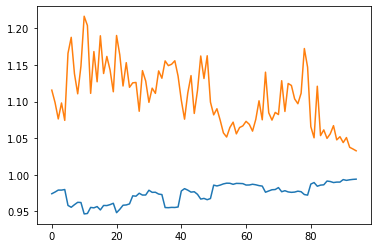

In [21]:
# import http.server
# import socketserver
# plt.plot(perplexity)
print(accReadings)
plt.plot(accReadings)
plt.plot(perplexity)
plt.show()
# PORT = 8080
# Handler = http.server.SimpleHTTPRequestHandler
# latest = tf.train.latest_checkpoint(checkpoint_dir)
# model = Model(inputs.shape, outputs.shape)
# model.load_weights(latest)

# with socketserver.TCPServer(("", PORT), Handler) as httpd:
#     print("serving at port", PORT)
#     httpd.serve_forever()

In [13]:
checkpoint_path="Training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

latest = tf.train.latest_checkpoint(checkpoint_dir)
model = Model((10, 100, 4), (10, 919))
model.load_weights(latest)
# Now that we've loaded our weights, we can do some simple tracking.
# model.evaluate(inputVal, outputVal)

# Let's 

(None, 919) (None, 100, 4)
